# Exercise 7  - Odin Kvarving

# Tasks

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

#Load mushroom-dataset
data = pd.read_csv("data/agaricus-lepiota.data")

#Dummfiy data
mushrooms = pd.get_dummies(data)

#Projecting dataset into 2 dimensions
pca = PCA(2)
mushrooms = pca.fit_transform(mushrooms)

#Visualize data before dummify/projection
data.head()


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Finding optimal number of clusters
By comparing the Silhouette-coefficient for each number of clusters, we can find the optimal number of clusters for the dataset

In [262]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import KMeans

result = []
for i in range(2, 31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mushrooms)
    result.append(metrics.silhouette_score(mushrooms, kmeans.labels_, metric='euclidean'))

print("Metrics-silhouette-score per n_clusters: ")
for i in result:
    print(i, end = ' ')



Metrics-silhouette-score per n_clusters: 
0.6097621036248415 0.7778438595831246 0.6786068357479663 0.6979778355021455 0.6262747677811397 0.5852731229339263 0.591241264000539 0.4927139957878417 0.5770131743976934 0.47952732305757906 0.48746080931943137 0.43129951583014836 0.4125728701664014 0.43083440404767215 0.4256934861302945 0.4200859324793538 0.4170261420789903 0.40979234906121986 0.41684647917995965 0.397920656759834 0.39678883891733346 0.40017252534852565 0.3809187530363437 0.4063434871102308 0.38480361234224386 0.38172061958683196 0.4017821852100555 0.3955343038230645 0.3769325574131559 

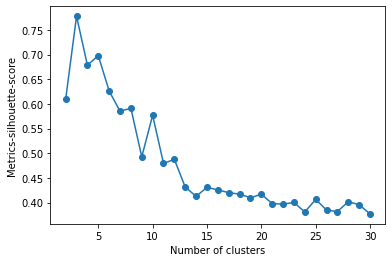

In [263]:
plt.figure()
plt.plot(range(2,31), result, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Metrics-silhouette-score")
plt.show()

In [264]:
clusters = np.argmax(result, axis=0) + 2

print("Metrics-silhouette-score:", result[np.argmax(result)])
print("Optimal number of clusters:", clusters)

Metrics-silhouette-score: 0.7778438595831246
Optimal number of clusters: 3


# Visualizing the data using optimal numbers of clusters (dimensions already reduced)

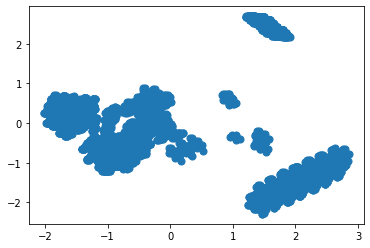

In [265]:
kmeans = KMeans(n_clusters=clusters)

plt.scatter(mushrooms[:, 0], mushrooms[:, 1], s=50);

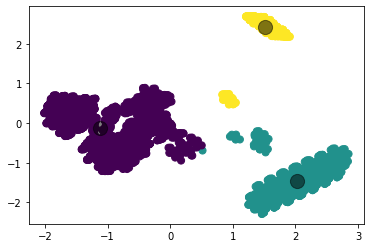

In [266]:
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(mushrooms)
y_kmeans = kmeans.predict(mushrooms)

plt.scatter(mushrooms[:, 0], mushrooms[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);